In [1]:
import pandas as pd   
import funcs
import re
from tqdm import tqdm
import seaborn as sns
from nltk.probability import FreqDist

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wwwri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wwwri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wwwri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
#function for initial removing links or other things which has similar construction
def prepare(stringy):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', stringy.lower())

#sav_path = 'data/arr_train.csv'
read_path = 'data/arr_test.csv'
#lod_path = 'data/ranking_train.jsonl'
lod_path = 'data/ranking_test.jsonl'

In [5]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', 170)  # or 199
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
#pd.reset_option('display.max_colwidth')
pd.options.display.expand_frame_repr = False

In [6]:
#Load data from jsonl
jsonObj = pd.read_json(path_or_buf=read_path, lines=True)
#initialization
zero_score = []
df = {"text":[], "comments":[], "lem_comments":[], "score":[]}
text_ar = []
comment_ar = []
score_ar = []
lem_text_ar = []
lem_com_ar = []

In [7]:
#Writing text, comments, scores into arrays and making them in lowercase, lemmatization
#len(jsonObj)
for i in tqdm(range(0,len(jsonObj))):
    for j in range(0, 5):
        text_ar.append(jsonObj['text'][i].lower())
        raw_text = prepare(jsonObj['text'][i])
        lem_text_ar.append(funcs.lemmatizer_func(raw_text)) 
        comment_ar.append(jsonObj["comments"][i][j]['text'].lower())
        raw_com = prepare(jsonObj["comments"][i][j]['text'])
        lem_com_ar.append(funcs.lemmatizer_func(raw_com))
        #lem_com_ar.append(funcs.text_preprocessing(raw_com))
        score_ar.append(jsonObj['comments'][i][j]['score'])

100%|██████████| 14004/14004 [04:56<00:00, 47.29it/s]


In [8]:
#Creating dictionary of values for pandas df
data_dict = {"text":text_ar, "lem_text":lem_text_ar, "comment":comment_ar,
    "lem_comments":lem_com_ar, "score":score_ar}

#Creating pandas df
df = pd.DataFrame(data_dict)
df.fillna('')

print(df[['text', 'lem_text']])

                                                    text                                 lem_text
0      ios 8.0.1 released, broken on iphone 6 models,...  io release break iphone model withdrawn
1      ios 8.0.1 released, broken on iphone 6 models,...  io release break iphone model withdrawn
2      ios 8.0.1 released, broken on iphone 6 models,...  io release break iphone model withdrawn
3      ios 8.0.1 released, broken on iphone 6 models,...  io release break iphone model withdrawn
4      ios 8.0.1 released, broken on iphone 6 models,...  io release break iphone model withdrawn
...                                                  ...                                      ...
70015                     why does gmail hate my domain?                        gmail hate domain
70016                     why does gmail hate my domain?                        gmail hate domain
70017                     why does gmail hate my domain?                        gmail hate domain
70018               

<Axes: >

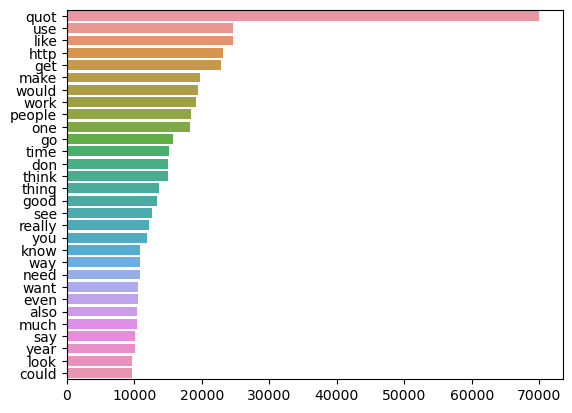

In [9]:
# сheck for most encounter words.
corpus = [word for i in df["lem_comments"].str.split().values.tolist() for word in i]
most_common = FreqDist(corpus).most_common(30)
words, frequency = [], []

for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

In [ ]:
a = FreqDist(corpus).most_common()
print(a[-1])

In [12]:
df.to_csv(sav_path)

In [ ]:
df.read_csv(read_path)